In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy.stats import chi2 

Full model summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Top10   No. Observations:                   51
Model:                            GLM   Df Residuals:                       45
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 Sep 2025   Deviance:                       5083.3
Time:                        21:54:23   Pearson chi2:                 7.79e+17
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.441e+1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1

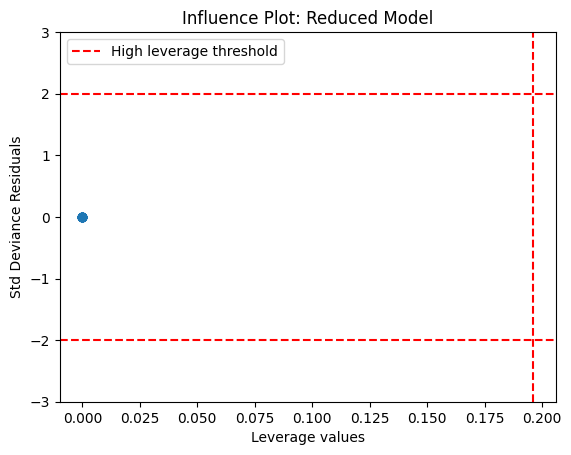

In [13]:
# --------------------------
# Question 1
# --------------------------

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2
import matplotlib.pyplot as plt

# a. Logistic regression with Miss America data
miss = pd.read_table("MissAmericato2008.txt")

# Top10 is a count (0–9). Create binary outcome (success, failure)
miss["failures"] = 9 - miss["Top10"]

# Fit full logistic regression
formula = "Top10 ~ LogPopulation + LogContestants + LogTotalArea + Latitude + Longitude"
my_model = smf.glm(formula, data=miss, family=sm.families.Binomial()).fit()
print("Full model summary:")
print(my_model.summary())

# Reduced model (dropping Longitude)
reduced_model = smf.glm(
    "Top10 ~ LogPopulation + LogContestants + LogTotalArea + Latitude",
    data=miss, family=sm.families.Binomial()
).fit()
print("\nReduced model summary:")
print(reduced_model.summary())

# Likelihood ratio test between models
lr_stat = 2 * (my_model.llf - reduced_model.llf)
df_diff = my_model.df_model - reduced_model.df_model
p_value = chi2.sf(lr_stat, df_diff)
print(f"\nLikelihood Ratio Test: chi2 = {lr_stat:.4f}, df = {df_diff}, p = {p_value:.4g}")

# b. Leverage & standardized deviance residuals (stable)
X = reduced_model.model.exog
mu = reduced_model.fittedvalues
W = np.diag(mu * (1 - mu))  # weight matrix for logistic regression

# Hat values using pseudo-inverse to avoid singular matrix
XtWX_pinv = np.linalg.pinv(X.T @ W @ X)
hvalues = np.diag(W @ X @ XtWX_pinv @ X.T)

# Standardized deviance residuals
deviance_resid = reduced_model.resid_deviance
std_deviance = deviance_resid / np.sqrt(1 - hvalues)

# Plot leverage vs standardized deviance
plt.scatter(hvalues, std_deviance)
plt.axvline(2 * 5 / len(miss), color="red", linestyle="--", label="High leverage threshold")
plt.axhline(2, color="red", linestyle="--")
plt.axhline(-2, color="red", linestyle="--")
plt.xlabel("Leverage values")
plt.ylabel("Std Deviance Residuals")
plt.ylim(-3, 3)
plt.title("Influence Plot: Reduced Model")
plt.legend()
plt.show()

In [15]:
# --------------------------
# Question 2
# --------------------------

# Load AIS data (space- or tab-delimited)
ais = pd.read_csv("ais.txt", delim_whitespace=True)

# a. Logistic regression
ais_model = smf.glm("Sex ~ RCC + WCC + BMI", data=ais, family=sm.families.Binomial()).fit()
print("GLM Logistic Regression Summary:\n")
print(ais_model.summary())

# b. Significant predictors are visible in summary (p-values)

# c. Odds ratios
odds_ratios = np.exp(ais_model.params)
print("\nOdds Ratios:\n", odds_ratios)

# d. Likelihood ratio test: compare model to null model
g_diff = ais_model.null_deviance - ais_model.deviance
df_diff = int(ais_model.df_model)  # number of predictors
p_val = 1 - chi2.cdf(g_diff, df_diff)  # <- use scipy.stats.chi2
print(f"\nLikelihood Ratio Test: G = {g_diff:.4f}, df = {df_diff}, p = {p_val:.4g}")

# e. Pseudo R^2 (deviance)
r2_dev = 1 - ais_model.deviance / ais_model.null_deviance
print(f"\nPseudo R^2 (deviance): {r2_dev:.4f}")

GLM Logistic Regression Summary:

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Sex   No. Observations:                  202
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.506
Date:                Sat, 06 Sep 2025   Deviance:                       147.01
Time:                        21:54:24   Pearson chi2:                     202.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4823
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2

/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_57463/1323575746.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ais = pd.read_csv("ais.txt", delim_whitespace=True)
